<a href="https://colab.research.google.com/github/Adizcool/Image_Classification_Using_CIFAR-10_Dataset/blob/main/Image_Classfication_using_CIFAR_10_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN Image classification using CIFAR Dataset

### Importing Libraries

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

### Loading Dataset and creating Training and Testing sets

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train.shape

170508288/170498071 [==============================] - 4s 0us/step


(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

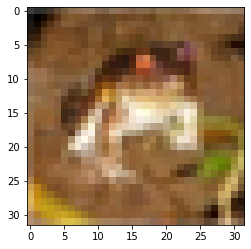

In [ ]:
plt.imshow(x_train[0])

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1, )
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

### Defining lables and function to display images

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plotimg (x, y, index):
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

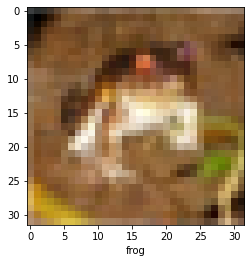

In [ ]:
plotimg(x_train, y_train, 0)

### Normalizing the pixel values

In [ ]:
#pixel values from 0 to 255
x_train = x_train / 255
x_test = x_test / 255

### Using simple ANN for image classification

In [ ]:
#Flattening layer to 32x32, passing it through 2 layers with 3000 and 1000 neurons and finally classifying it into one of 10 classes
ann = models.Sequential([
                        layers.Flatten(input_shape=(32,32,3)),
                        layers.Dense(3000, activation='relu'),
                        layers.Dense(1000, activation='relu'),
                        layers.Dense(10, activation='softmax')    
                        ])

#Compiling metric arguments for ANN
ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Training the ANN
ann.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 89s 56ms/step - loss: 1.8145 - accuracy: 0.3540
Epoch 2/10
1563/1563 [==============================] - 88s 56ms/step - loss: 1.6258 - accuracy: 0.4272
Epoch 3/10
1563/1563 [==============================] - 88s 56ms/step - loss: 1.5428 - accuracy: 0.4568
Epoch 4/10
1563/1563 [==============================] - 88s 56ms/step - loss: 1.4837 - accuracy: 0.4772
Epoch 5/10
1563/1563 [==============================] - 87s 56ms/step - loss: 1.4342 - accuracy: 0.4940
Epoch 6/10
1563/1563 [==============================] - 87s 56ms/step - loss: 1.3885 - accuracy: 0.5120
Epoch 7/10
1563/1563 [==============================] - 87s 56ms/step - loss: 1.3517 - accuracy: 0.5223
Epoch 8/10
1563/1563 [==============================] - 87s 56ms/step - loss: 1.3175 - accuracy: 0.5346
Epoch 9/10
1563/1563 [==============================] - 87s 56ms/step - loss: 1.2859 - accuracy: 0.5483
Epoch 10/10
1563/1563 [==============================] - 87s 56m

In [ ]:
ann.evaluate(x_test, y_test)

313/313 [==============================] - 6s 20ms/step - loss: 1.5092 - accuracy: 0.4622


[1.5092377662658691, 0.46219998598098755]

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))


Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.32      0.45      1000
           1       0.38      0.84      0.52      1000
           2       0.63      0.10      0.18      1000
           3       0.38      0.33      0.35      1000
           4       0.43      0.50      0.46      1000
           5       0.47      0.36      0.41      1000
           6       0.58      0.52      0.55      1000
           7       0.52      0.66      0.58      1000
           8       0.42      0.80      0.55      1000
           9       0.60      0.18      0.28      1000

    accuracy                           0.46     10000
   macro avg       0.51      0.46      0.43     10000
weighted avg       0.51      0.46      0.43     10000



### As we can see, ANN does not provide us with high accuracy or precision for any class

### Now let us build a CNN

In [ ]:
cnn = models.Sequential([
                        #cnn
                        
                        #convolution value
                        layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
                        #pooling
                        layers.MaxPooling2D((2, 2)),

                        #second layer
                        layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
                        layers.MaxPooling2D((2, 2)),
    
                        #dense
                        layers.Flatten(),
                        #Not too many layers required for cnn
                        layers.Dense(128, activation='relu'),
                        #Softmax will give normalized values
                        layers.Dense(10, activation='softmax')
                       ])

In [ ]:
#compiling cnn
cnn.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
           )

In [ ]:
cnn.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 56s 36ms/step - loss: 1.3818 - accuracy: 0.5069
Epoch 2/10
1563/1563 [==============================] - 56s 36ms/step - loss: 1.0428 - accuracy: 0.6343
Epoch 3/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.9110 - accuracy: 0.6822
Epoch 4/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.8082 - accuracy: 0.7190
Epoch 5/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.7248 - accuracy: 0.7468
Epoch 6/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.6488 - accuracy: 0.7744
Epoch 7/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.5817 - accuracy: 0.7963
Epoch 8/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.5160 - accuracy: 0.8208
Epoch 9/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.4571 - accuracy: 0.8407
Epoch 10/10
1563/1563 [==============================] - 57s 36m

In [ ]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 1.0134 - accuracy: 0.7064


[1.0133732557296753, 0.7063999772071838]

In [ ]:
y_test = y_test.reshape(-1, ) 

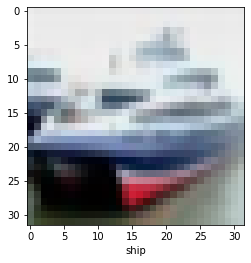

In [ ]:
plotimg(x_test, y_test, 1)

In [ ]:
y_pred = cnn.predict(x_test)
y_pred[:5]

array([[2.47180986e-04, 1.26756215e-03, 8.44160188e-03, 9.75062609e-01,
        4.42643541e-05, 8.94459710e-03, 1.80856150e-03, 2.09923783e-05,
        4.14508116e-03, 1.75109744e-05],
       [4.43069381e-04, 1.94873691e-01, 1.49221862e-07, 2.53174315e-10,
        3.14846393e-09, 6.81350878e-11, 1.18049025e-11, 6.03084943e-12,
        8.01957726e-01, 2.72536394e-03],
       [4.20570467e-03, 2.54779812e-02, 4.45289956e-03, 3.48395412e-03,
        2.00417731e-03, 8.23301889e-05, 2.12074519e-05, 2.39007888e-04,
        9.14272785e-01, 4.57600169e-02],
       [8.61161411e-01, 1.58983155e-03, 2.80216988e-02, 1.22283818e-02,
        3.72098684e-02, 3.21554398e-05, 9.28050031e-06, 2.54189695e-06,
        5.97436205e-02, 1.09281950e-06],
       [6.19038687e-08, 3.73480475e-07, 5.42199879e-04, 3.74685563e-02,
        8.47152293e-01, 1.81340074e-04, 1.14644833e-01, 1.96517234e-07,
        9.06743571e-06, 9.97343250e-07]], dtype=float32)

In [ ]:
y_classes = [np.argmax(i) for i in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

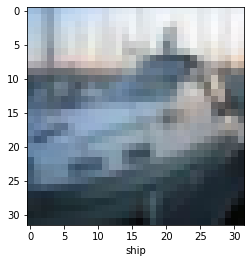

In [ ]:
plotimg(x_test, y_test, 2)

In [ ]:
classes[y_classes[2]]

'ship'

In [ ]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.71      0.73      1000
           1       0.82      0.82      0.82      1000
           2       0.68      0.54      0.61      1000
           3       0.52      0.55      0.54      1000
           4       0.64      0.67      0.65      1000
           5       0.67      0.54      0.60      1000
           6       0.78      0.78      0.78      1000
           7       0.69      0.80      0.74      1000
           8       0.73      0.85      0.78      1000
           9       0.79      0.81      0.80      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.70     10000
weighted avg       0.71      0.71      0.70     10000



### We notice that CNN is able to produce much better results than the ANN model

# Predicting an image outside the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

#loading the image
img = load_img(r"gdrive/My Drive/Colab Notebooks/ship.jpg", target_size=(32, 32))
img2 = img
#converting the image to an array
img = img_to_array(img)
img = img.reshape(1, 32, 32, 3)
#preparing the pixel data
img = img.astype('float32')
img = img / 255.0

result = cnn.predict(img)

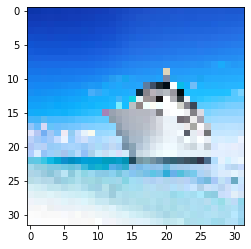

In [ ]:
plt.imshow(img2)

In [ ]:
ans = [np.argmax(i) for i in result]

In [ ]:
classes[ans[0]]

'ship'

# Thus we can safely conclude that the CNN model we created is able to predict images of classes present in the dataset accurately